In [1]:
import pandas as pd

folder = './data/'
filename = 'heparin2.xlsx'
df = pd.read_excel(folder+filename)
# df.columns = ['size', 'number', 'concentration', 'volume', 'area']
df.head()

,Depth,Name,Statistic,#Cells
0,NaN,A1 Well_073.fcs,NaN,360096
1,>,A1 Well_073.fcs/Lymphocytes,20.1,72501
2,> >,A1 Well_073.fcs/Lymphocytes/Single Cells,88.9,64455
3,> > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,60.4,38932
4,> > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,74.1,28854


In [2]:
df_mdsc = df.loc[df['Depth']=='> > > > > > > '].copy()
df_mdsc.head()

,Depth,Name,Statistic,#Cells
8,> > > > > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,0.030,5
9,> > > > > > >,A1 Well_073.fcs/Lymphocytes/Single Cells/Singl...,0.210,36
18,> > > > > > >,A2 Well_074.fcs/Lymphocytes/Single Cells/Singl...,0.023,2
19,> > > > > > >,A2 Well_074.fcs/Lymphocytes/Single Cells/Singl...,0.260,23
28,> > > > > > >,A3 Well_075.fcs/Lymphocytes/Single Cells/Singl...,0.037,3


In [3]:
df_mdsc[['well', 'population']] = df_mdsc['Name'].str.split('.fcs', expand=True)
df_mdsc = df_mdsc.drop(columns=['Name', 'Depth'])

In [4]:
df_mdsc['population'] = df_mdsc['population'].str.split('CD11b/', expand=True)[1]

In [5]:
well_removal = ('C10')
well_removal

'C10'

In [6]:
df_mdsc = df_mdsc.loc[~df_mdsc['well'].str.startswith(well_removal)].copy()

In [7]:
df_mdsc.head()

,Statistic,#Cells,well,population
8,0.030,5,A1 Well_073,gMDSC
9,0.210,36,A1 Well_073,mMDSC
18,0.023,2,A2 Well_074,gMDSC
19,0.260,23,A2 Well_074,mMDSC
28,0.037,3,A3 Well_075,gMDSC


In [8]:
pb_wells = []
for char in ('A', 'B', 'C'):
  for i in range(1, 13):
    if char == 'C' and i > 9:
      break
    pb_wells.append(f'{char}{i}')
pb_wells = tuple(pb_wells)

thymus_wells = []
for char in ('E', 'F'):
  for i in range(1, 13):
    thymus_wells.append(f'{char}{i}')
thymus_wells = tuple(thymus_wells)

In [9]:
df_mdsc['organ'] = ''
df_mdsc.loc[df_mdsc['well'].str.startswith(pb_wells), 'organ'] = 'blood'
df_mdsc.loc[df_mdsc['well'].str.startswith(thymus_wells), 'organ'] = 'thymus'

In [10]:
control_wells = []
for c in ('A', 'B', 'C', 'E', 'F'):
  for i in range(1,3):
    control_wells.append(f'{c}{i}')
control_wells = tuple(control_wells)

sham_sham_wells = (tuple(f'A{i}' for i in range(3,8)) + 
                   tuple(f'E{i}' for i in range(6,13)))
sham_hep_wells = (tuple(f'C{i}' for i in range(7,10)) + 
                   tuple(f'E{i}' for i in range(3,6)))

gl261_sham_wells = tuple(f'A{i}' for i in range(8,13))
gl261_hep_wells = tuple(f'B{i}' for i in range(3,7))

sb28_sham_wells = (tuple(f'B{i}' for i in range(7,13)) + 
                   tuple(f'F{i}' for i in range(7,13)))
sb28_hep_wells = (tuple(f'C{i}' for i in range(3,7)) + 
                   tuple(f'F{i}' for i in range(3,7)))

In [11]:
df_mdsc['group'] = ''
df_mdsc.loc[df_mdsc['well'].str.startswith(control_wells), 'group'] = 'control'
df_mdsc.loc[df_mdsc['well'].str.startswith(sham_sham_wells), 'group'] = 'sham+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(sham_hep_wells), 'group'] = 'sham+hep'
df_mdsc.loc[df_mdsc['well'].str.startswith(gl261_sham_wells), 'group'] = 'GL261+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(gl261_hep_wells), 'group'] = 'GL261+hep'
df_mdsc.loc[df_mdsc['well'].str.startswith(sb28_sham_wells), 'group'] = 'SB28+sham'
df_mdsc.loc[df_mdsc['well'].str.startswith(sb28_hep_wells), 'group'] = 'SB28+hep'

In [12]:
df_mdsc.loc[(df_mdsc['group'] == 'sham+sham') & 
            (df_mdsc['organ'] == 'thymus') & 
            (df_mdsc['population'] == 'mMDSC')]

,Statistic,#Cells,well,population,organ,group
399,6.61,37,E6 Well_112,mMDSC,thymus,sham+sham
409,4.10,72,E7 Well_113,mMDSC,thymus,sham+sham
419,2.66,26,E8 Well_114,mMDSC,thymus,sham+sham
429,2.55,23,E9 Well_115,mMDSC,thymus,sham+sham
439,0.93,10,E10 Well_116,mMDSC,thymus,sham+sham
449,2.51,25,E11 Well_117,mMDSC,thymus,sham+sham
459,2.13,19,E12 Well_118,mMDSC,thymus,sham+sham


In [13]:
stats = df_mdsc.groupby(['group', 'organ', 'population']).describe()
stats['Statistic'].head()

count      mean       std    min      25%  \
group      organ population                                              
GL261+hep  blood gMDSC         4.0  0.070000  0.016553  0.054  0.06150   
                 mMDSC         4.0  0.185000  0.010000  0.170  0.18500   
GL261+sham blood gMDSC         5.0  0.024362  0.019033  0.000  0.00881   
                 mMDSC         5.0  0.720000  0.900056  0.310  0.31000   
SB28+hep   blood gMDSC         4.0  0.074750  0.025812  0.052  0.05275   

                                50%     75%    max  
group      organ population                         
GL261+hep  blood gMDSC       0.0665  0.0750  0.093  
                 mMDSC       0.1900  0.1900  0.190  
GL261+sham blood gMDSC       0.0330  0.0350  0.045  
                 mMDSC       0.3200  0.3300  2.330  
SB28+hep   blood gMDSC       0.0735  0.0955  0.100

In [14]:
mean_stats = stats['Statistic'].loc[:, ['mean']]
mean_stats.head()

mean
group      organ population          
GL261+hep  blood gMDSC       0.070000
                 mMDSC       0.185000
GL261+sham blood gMDSC       0.024362
                 mMDSC       0.720000
SB28+hep   blood gMDSC       0.074750

In [15]:
groups = set([r[0] for r in mean_stats.index])
groups.discard('control')
groups = list(groups)
groups

['SB28+sham', 'GL261+hep', 'GL261+sham', 'sham+hep', 'SB28+hep', 'sham+sham']

In [16]:
sort_map = {
  'sham+sham': 0,
  'sham+hep': 1,
  'GL261+sham': 2,
  'GL261+hep': 3,
  'SB28+sham': 4,
  'SB28+hep': 5,
}

In [17]:
out = mean_stats.loc[groups]
out = out.sort_index(level='group', key=lambda x: x.map(sort_map))
out.head()

mean
group     organ  population          
sham+sham blood  gMDSC       0.054000
                 mMDSC       0.470000
          thymus gMDSC       0.044286
                 mMDSC       3.070000
sham+hep  blood  gMDSC       0.064000

In [18]:
from scipy.stats import ttest_ind

out['p-value'] = ''
out['95% CI'] = ''

comparison_groups = (
  ('sham+sham', 'GL261+sham'),
  ('sham+sham', 'SB28+sham'),
  ('sham+hep', 'GL261+hep'),
  ('sham+hep', 'SB28+hep'),
)

organs = (
  'blood',
  'thymus',
)

populations = (
  'gMDSC',
  'mMDSC',
)

for subgroup in comparison_groups:
  for organ in organs:
    for pop in populations:
      vector_filter = (df_mdsc['organ'] == organ) & (df_mdsc['population'] == pop)
      res = ttest_ind(
        df_mdsc.loc[vector_filter & (df_mdsc['group'] == subgroup[0]), 'Statistic'],
        df_mdsc.loc[vector_filter & (df_mdsc['group'] == subgroup[1]), 'Statistic'],
      )
      ci = res.confidence_interval()
      out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
      out.at[(subgroup[1], organ, pop), '95% CI'] = f"[{ci.low:.2f}, {ci.high:.2f}]"

out

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_36717/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_36717/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_36717/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_36717/4185977544.py:32: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{

mean p-value          95% CI
group      organ  population                                  
sham+sham  blood  gMDSC       0.054000                        
                  mMDSC       0.470000                        
           thymus gMDSC       0.044286                        
                  mMDSC       3.070000                        
sham+hep   blood  gMDSC       0.064000                        
                  mMDSC       0.250000                        
           thymus gMDSC       0.030000                        
                  mMDSC       2.660000                        
GL261+sham blood  gMDSC       0.024362    0.25   [-0.02, 0.08]
                  mMDSC       0.720000    0.58   [-1.25, 0.75]
GL261+hep  blood  gMDSC       0.070000    0.74   [-0.05, 0.04]
                  mMDSC       0.185000    0.15   [-0.03, 0.16]
SB28+sham  blood  gMDSC       0.179833  0.02**  [-0.23, -0.02]
                  mMDSC       0.436667    0.83   [-0.30, 0.37]
           thymus gMDSC       0.035000    0.82   [-0.08, 0.10]
                  mMDSC       4.461667    0.18   [-3.52, 0.74]
SB28+hep   blood  gMDSC       0.074750    0.62   [-0.06, 0.04]
                  mMDSC       0.442500  0.05**  [-0.38, -0.00]
           thymus gMDSC       0.000000    0.29   [-0.03, 0.09]
                  mMDSC       6.585000  0.00**  [-5.36, -2.49]
GL261+sham thymus gMDSC            NaN     nan      [nan, nan]
                  mMDSC            NaN     nan      [nan, nan]
GL261+hep  thymus gMDSC            NaN     nan      [nan, nan]
                  mMDSC            NaN     nan      [nan, nan]

In [19]:
out_reset = out.reset_index()
display(out_reset.loc[(out_reset['organ'] == 'blood') 
                      & (out_reset['population'] == 'mMDSC')]
                  .set_index(['group', 'organ', 'population']))

display(out_reset.loc[(out_reset['organ'] == 'thymus') 
                      & (out_reset['population'] == 'mMDSC')]
                  .set_index(['group', 'organ', 'population']).dropna())


,,,mean,p-value,95% CI
group,organ,population,,,
sham+sham,blood,mMDSC,0.470000,,
sham+hep,blood,mMDSC,0.250000,,
GL261+sham,blood,mMDSC,0.720000,0.58,"[-1.25, 0.75]"
GL261+hep,blood,mMDSC,0.185000,0.15,"[-0.03, 0.16]"
SB28+sham,blood,mMDSC,0.436667,0.83,"[-0.30, 0.37]"
SB28+hep,blood,mMDSC,0.442500,0.05**,"[-0.38, -0.00]"


,,,mean,p-value,95% CI
group,organ,population,,,
sham+sham,thymus,mMDSC,3.070000,,
sham+hep,thymus,mMDSC,2.660000,,
SB28+sham,thymus,mMDSC,4.461667,0.18,"[-3.52, 0.74]"
SB28+hep,thymus,mMDSC,6.585000,0.00**,"[-5.36, -2.49]"


In [20]:
df_mdsc.head()

,Statistic,#Cells,well,population,organ,group
8,0.030,5,A1 Well_073,gMDSC,blood,control
9,0.210,36,A1 Well_073,mMDSC,blood,control
18,0.023,2,A2 Well_074,gMDSC,blood,control
19,0.260,23,A2 Well_074,mMDSC,blood,control
28,0.037,3,A3 Well_075,gMDSC,blood,sham+sham


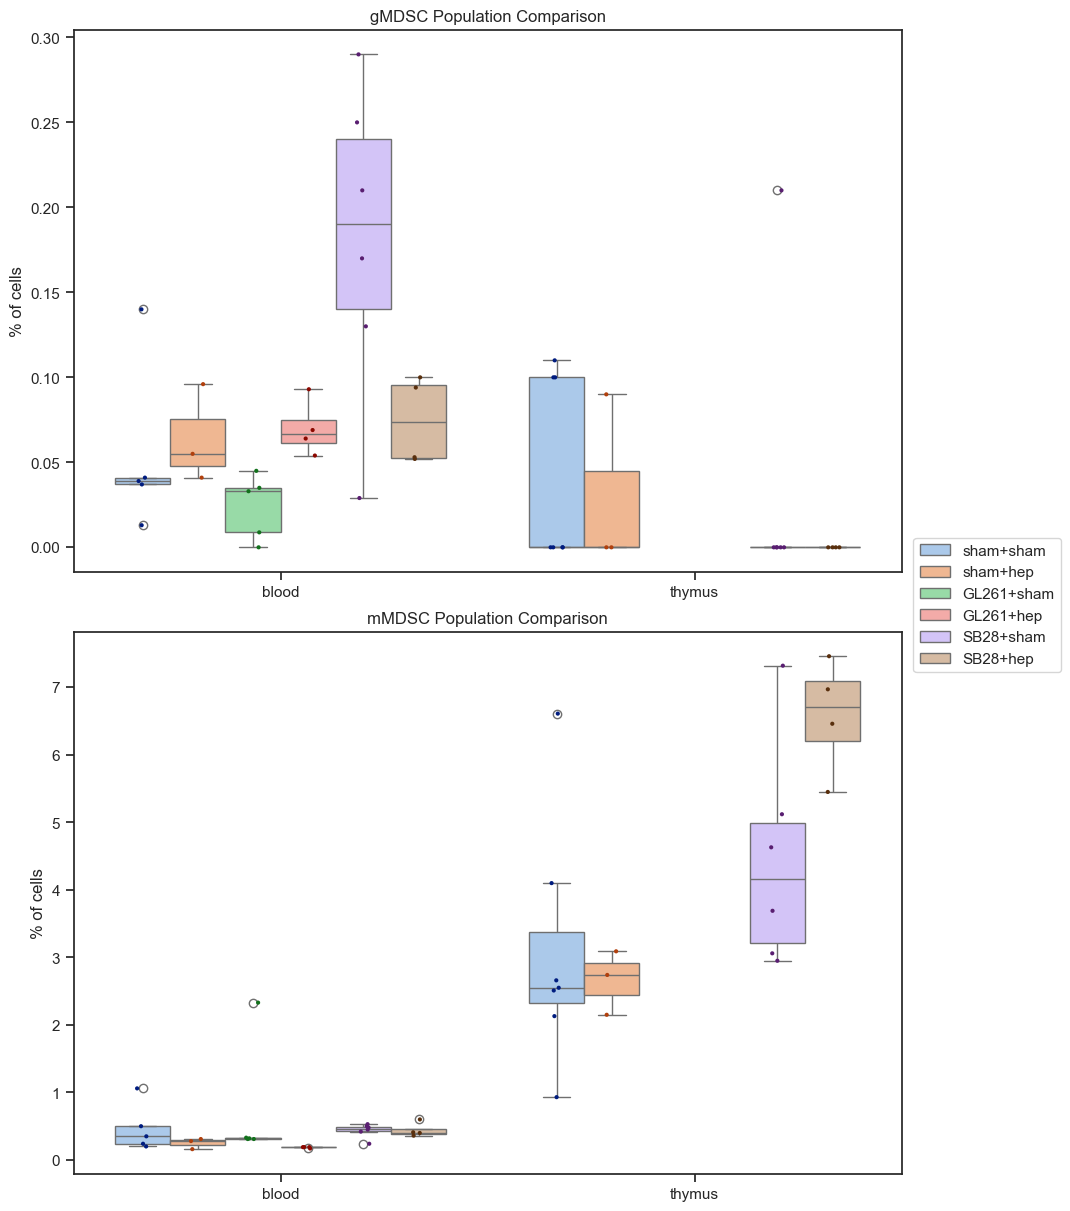

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")
# sns.set_theme(style="ticks", palette="Set1")

fig, axs = plt.subplots(2, 1, figsize=(9, 12), layout='constrained')

for i, pop in enumerate(('gMDSC', 'mMDSC')):
  data = df_mdsc.loc[
      (df_mdsc['group'] != 'control') & (df_mdsc['population'] == pop)
    ]
  data = data.sort_values('group', key=lambda x: x.map(sort_map))
  g = sns.boxplot(
    data,
    x="organ", y="Statistic",
    hue="group",
    ax=axs[i],
  )

  sns.stripplot(
    data,
    x="organ", y="Statistic",
    hue="group", palette='dark',
    size=3, dodge=True,
    ax=axs[i],
    legend=False
  )
  g.set_title(f'{pop} Population Comparison')
  g.set_ylabel('% of cells')
  g.set_xlabel('')
  axs[i].legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()

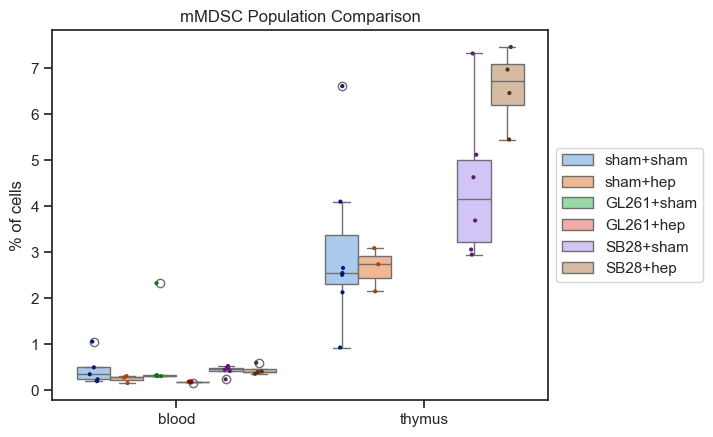

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

data = df_mdsc.loc[
    (df_mdsc['group'] != 'control') & (df_mdsc['population'] == 'mMDSC')
  ]
data = data.sort_values('group', key=lambda x: x.map(sort_map))
g = sns.boxplot(
  data,
  x="organ", y="Statistic",
  hue="group",
)

sns.stripplot(
  data,
  x="organ", y="Statistic",
  hue="group", palette='dark',
  size=3, dodge=True,
  legend=False
)
g.set_title(f'{pop} Population Comparison')
g.set_ylabel('% of cells')
g.set_xlabel('')

handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()

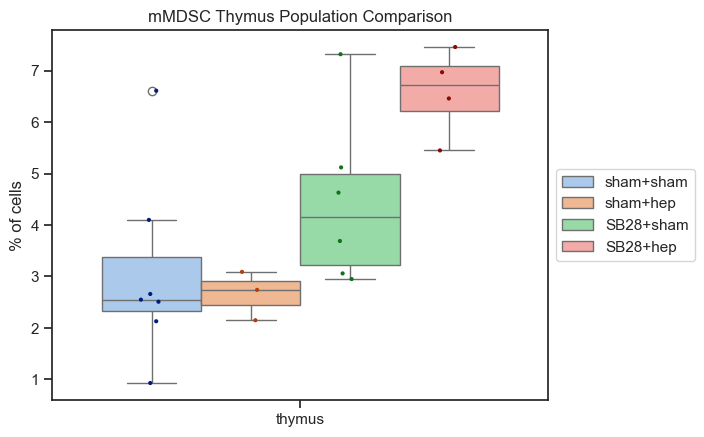

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

data = df_mdsc.loc[
    (df_mdsc['group'] != 'control') & (df_mdsc['population'] == 'mMDSC') & (df_mdsc['organ'] == 'thymus')
  ]
data = data.sort_values('group', key=lambda x: x.map(sort_map))
g = sns.boxplot(
  data,
  x="organ", y="Statistic",
  hue="group",
)
sns.stripplot(
  data,
  x="organ", y="Statistic",
  hue="group", palette='dark',
  size=3, dodge=True,
  legend=False
)

g.set_title('mMDSC Thymus Population Comparison')
g.set_ylabel('% of cells')
g.set_xlabel('')

handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()